In [111]:
import geopandas as gpd
import pandas as pd
import folium
from folium.features import GeoJsonPopup
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df_crime = gpd.read_file('CrimeByType2012-2023.csv')
df_buurt = gpd.read_file('Buurten.geojson')

In [113]:
df_crime.head(100)

,Crime type,Neighborhood,Period,Registered Crimes,geometry
0,Total felonies,Breda,12.Jan,1382,None
1,Total felonies,Breda,12.Feb,1284,None
2,Total felonies,Breda,12.Mar,1375,None
3,Total felonies,Breda,12.Apr,1341,None
4,Total felonies,Breda,12.May,1455,None
...,...,...,...,...,...
95,Total felonies,Breda,19.Dec,889,None
96,Total felonies,Breda,20.Jan,1123,None
97,Total felonies,Breda,20.Feb,1141,None
98,Total felonies,Breda,20.Mar,835,None


In [114]:
print(df_crime.isnull().sum())

Crime type                0
Neighborhood              0
Period                    0
Registered Crimes         0
geometry             541620
dtype: int64


In [115]:
df_crime = df_crime.drop('geometry', axis=1)

In [116]:
df_crime.value_counts('Neighborhood')

Neighborhood
Bavel             7965
Moleneind-oost    7965
Prinsenbeek       7965
Princenhage       7965
Overkroeten       7965
                  ... 
Ginneken          7965
Haagpoort         7965
Hagebeemd         7965
Hazeldonk         7965
Zandberg          7965
Length: 68, dtype: int64

In [117]:
print(df_crime.describe())

              Crime type Neighborhood  Period Registered Crimes
count             541620       541620  541620            541620
unique                59           68     135               432
top     Total felonies      Breda      12.Jan                 0
freq                9180         7965    4012            409878


In [118]:
df_buurt.head(10)

,OBJECTID,BUURTCODE,BUURT,OPPERVLAKTE,WOONPLAATS,GEMEENTE,WIJK,WIJKCODE,GEMEENTECODE,WOONPLAATSCODE,Shape__Area,Shape__Length,geometry
0,117,0601,Kievitsloop,8.673975e+05,Breda,Breda,Breda noord-west,06,0758,3622,8.673975e+05,4537.349925,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ..."
1,118,0503,Princenhage,2.635851e+06,Breda,Breda,Breda west,05,0758,3622,2.635851e+06,9091.953572,"POLYGON ((4.74373 51.57291, 4.74363 51.57176, ..."
2,119,0203,Heusdenhout,1.522862e+06,Breda,Breda,Breda oost,02,0758,3622,1.522863e+06,6566.784776,"POLYGON ((4.82923 51.59268, 4.82853 51.59194, ..."
3,120,0709,Buitengebied Bavel,8.558344e+06,Bavel,Breda,Bavel,07,0758,3624,8.558344e+06,20311.346552,"POLYGON ((4.87119 51.56827, 4.87135 51.56790, ..."
4,121,0002,Chassé,4.089054e+05,Breda,Breda,Breda centrum,00,0758,3622,4.089054e+05,3180.458017,"POLYGON ((4.78630 51.58690, 4.78298 51.58366, ..."
5,122,0309,Mastbos,1.340741e+07,Breda,Breda,Breda zuid-oost,03,0758,3622,1.340741e+07,18318.224255,"POLYGON ((4.78953 51.55290, 4.78953 51.55285, ..."
6,123,0302,Overakker,1.341355e+06,Breda,Breda,Breda zuid-oost,03,0758,3622,1.341355e+06,6715.777718,"POLYGON ((4.81183 51.56596, 4.81192 51.56569, ..."
7,124,0001,Valkenberg,4.146800e+05,Breda,Breda,Breda centrum,00,0758,3622,4.146800e+05,2967.730359,"POLYGON ((4.78814 51.59321, 4.78819 51.59320, ..."
8,125,0201,Sportpark,1.216742e+06,Breda,Breda,Breda oost,02,0758,3622,1.216742e+06,4648.061381,"POLYGON ((4.80402 51.58156, 4.80539 51.57977, ..."
9,126,0004,Schorsmolen,2.763711e+05,Breda,Breda,Breda centrum,00,0758,3622,2.763711e+05,2549.950857,"POLYGON ((4.77195 51.58990, 4.77103 51.58887, ..."


In [119]:
df_buurt.value_counts('WIJK')

WIJK
Breda west          10
Breda noord-west     9
Breda noord          8
Breda centrum        6
Breda oost           6
Breda zuid-oost      5
Bavel                3
Teteringen           3
Breda zuid           2
Prinsenbeek          2
Ulvenhout            2
dtype: int64

In [120]:
# Merge the DataFrames on the 'Neighborhood' and 'BUURT' columns
merged_df = pd.merge(df_buurt, df_crime, left_on='BUURT', right_on='Neighborhood', how='inner')


In [121]:
merged_df.head()

,OBJECTID,BUURTCODE,BUURT,OPPERVLAKTE,WOONPLAATS,GEMEENTE,WIJK,WIJKCODE,GEMEENTECODE,WOONPLAATSCODE,Shape__Area,Shape__Length,geometry,Crime type,Neighborhood,Period,Registered Crimes
0,117,0601,Kievitsloop,867397.482,Breda,Breda,Breda noord-west,06,0758,3622,867397.482117,4537.349925,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Jan,22
1,117,0601,Kievitsloop,867397.482,Breda,Breda,Breda noord-west,06,0758,3622,867397.482117,4537.349925,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Feb,14
2,117,0601,Kievitsloop,867397.482,Breda,Breda,Breda noord-west,06,0758,3622,867397.482117,4537.349925,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Mar,16
3,117,0601,Kievitsloop,867397.482,Breda,Breda,Breda noord-west,06,0758,3622,867397.482117,4537.349925,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Apr,13
4,117,0601,Kievitsloop,867397.482,Breda,Breda,Breda noord-west,06,0758,3622,867397.482117,4537.349925,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.May,15


In [123]:
columns_to_drop = [ 'GEMEENTE', 'OBJECTID', 'BUURTCODE', 'WIJKCODE', 'GEMEENTECODE', 'WOONPLAATSCODE', 'OPPERVLAKTE', 'WOONPLAATS', 'Shape__Area', 'Shape__Length']
merged_df.drop(columns=columns_to_drop, inplace=True)

In [124]:
merged_df.head(10)

,BUURT,WIJK,geometry,Crime type,Neighborhood,Period,Registered Crimes
0,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Jan,22
1,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Feb,14
2,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Mar,16
3,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Apr,13
4,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.May,15
5,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Jun,10
6,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Jul,25
7,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Aug,23
8,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Sep,26
9,Kievitsloop,Breda noord-west,"POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...",Total felonies,Kievitsloop,12.Oct,24


<AxesSubplot:>

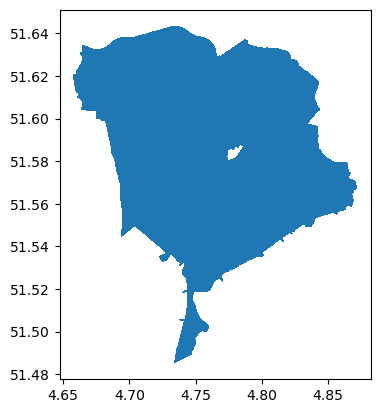

In [125]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

# Plot the GeoDataFrame
gdf.plot()